In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
from astropy import constants as const

In [2]:
t_bh = np.loadtxt("Data/triple_times.txt")
z_bh = z_at_value(cosmo.age, (t_bh/10**9)*u.Gyr, zmax=1000)
z_bh = np.array(z_bh)

In [3]:
print("z-max:",np.max(z_bh))
print("z-min",np.min(z_bh))

z-max: 3.2761646414750767
z-min 0.0017927551536701253


In [4]:
zmax = 4
zbinsize = 0.01

boxsize = 75.0
omega_m = 0.2726
omega_l = 0.7274
h = 0.704
vol_comov_box = (boxsize/h)**3 #Mpc^3

In [60]:
lgzbinsize = 0.1
lgzmin = -3.0
lgzmax = 1.0
lgz_bh = np.log10(z_bh)

In [61]:
def unit_comoving_vol(z):

    D_H = const.c.to('km/s').value/cosmo.H0.value

    #return  D_H * cosmo.D_M(0.0,z)**2 / np.sqrt(omega_m*(1+z)**3 + omega_l) 
    return D_H * cosmo.comoving_transverse_distance(z).value**2 * cosmo.inv_efunc(z)

In [62]:
cosmo.differential_comoving_volume(z_bh)

<Quantity [4.11909725e+10, 3.06740874e+10, 4.22939811e+10, 4.11341302e+10,
           3.49769216e+10, 2.80109197e+09, 3.69743138e+10, 8.57032802e+09,
           4.25770482e+10, 3.91756513e+10, 1.03370473e+10, 1.66917190e+10,
           4.20728947e+10, 4.23668712e+10, 3.68707040e+10, 3.16310766e+10,
           8.51250147e+07, 4.25695985e+10, 3.80725462e+10, 3.44748184e+10,
           2.30925263e+10, 4.15680727e+10, 3.22127670e+10, 4.25747504e+10,
           3.60120366e+10, 2.25721490e+10, 3.96853488e+10, 4.21093255e+10,
           8.48564219e+09, 8.49404745e+09, 3.09592280e+10, 1.46148255e+09,
           4.24298616e+10, 1.91262232e+10, 5.45854335e+08, 8.89689694e+09,
           4.08968209e+10, 3.45589100e+10, 7.86929127e+09, 4.25808123e+10,
           8.95871240e+09, 3.97597150e+10, 3.45599511e+10, 4.25750388e+10,
           3.78940879e+10, 3.96853652e+10, 2.26507881e+10, 1.94465823e+10,
           1.38021884e+07, 2.96213200e+10, 4.25671820e+10, 4.06418075e+10,
           2.96064687e+10

In [63]:
dVcratio = np.array([unit_comoving_vol(z) 
                                  for z in z_bh ]) * 4*np.pi/vol_comov_box

In [64]:
Nmrg_zhist,zbin_edges = np.histogram(z_bh,range=(0,zmax),bins=int(zmax/zbinsize))
zbins = zbin_edges[:-1]+0.5*zbinsize
dNmrgdz,tmp = np.histogram(z_bh,weights=dVcratio,bins=zbin_edges)

In [65]:
lgz_bh = np.log10(z_bh)

Nmrg_lgzhist,lgzbin_edges = np.histogram(lgz_bh,range=(lgzmin,lgzmax),
                                             bins=int((lgzmax-lgzmin)/lgzbinsize))
lgzbins = lgzbin_edges[:-1]+0.5*lgzbinsize
Nmrg_lgzhist = Nmrg_lgzhist.astype('float64')

In [66]:
dt_lgzbins = []

for i in range(lgzbins.size):
    zatage = cosmo.age(10**(lgzbins[i]-0.5*lgzbinsize))-cosmo.age(10**(lgzbins[i]+0.5*lgzbinsize))
    dt_lgzbins.append(float(zatage/u.Gyr))
    
dt_lgzbins = np.array(dt_lgzbins)

In [67]:
dNmrgdlogz,tmp = np.histogram(lgz_bh,weights=dVcratio,
                                                 bins=lgzbin_edges)

In [69]:
dNmrgdlogzdt_allsky = np.array([dNmrgdlogz[i]/(dt_lgzbins[i]*10**9)
                                             for i in range(lgzbins.size)]) ## yr^-1

In [70]:
import scienceplots

Text(0, 0.5, '$d^2 N / d \\log z dt$')

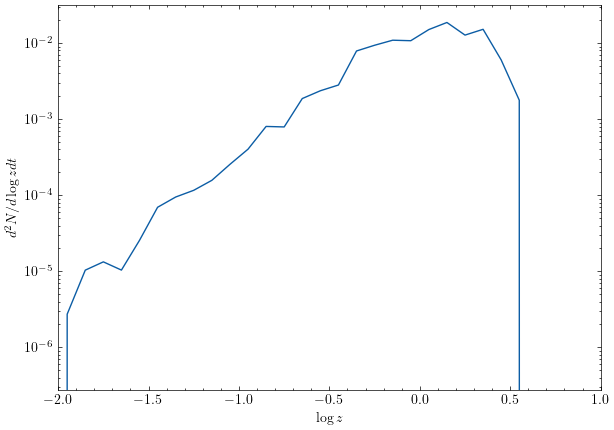

In [71]:
plt.style.use("science")
plt.figure(figsize=[7,5])
plt.plot(lgzbins,dNmrgdlogzdt_allsky)
plt.yscale("log")
plt.xlim(-2,1)
plt.xlabel("$\log z$")
plt.ylabel("$d^2 N / d \log z dt$")
#plt.savefig("Figures/Merger_rate_total.pdf")

In [72]:
#merger rate 
np.sum(dNmrgdlogzdt_allsky*lgzbinsize) #yr^-1

0.011821906152845273

In [38]:
zmax = 4 
zbinsize = 0.2
Nmrg_hist,zbin_edges = np.histogram(z_bh,range=(0,zmax),bins=int(zmax/zbinsize))
zbins = zbin_edges[:-1] + 0.5*zbinsize

In [40]:
dt_zbins = []

for i in range(zbins.size):
    zatage = cosmo.age(zbins[i]-0.5*zbinsize)-cosmo.age(zbins[i]+0.5*zbinsize)
    dt_zbins.append(float(zatage/u.Gyr))

dt_zbins = np.array(dt_zbins)

In [41]:
Nmrg_zhist,zbin_edges = np.histogram(z_bh,range=(0,zmax),bins=int(zmax/zbinsize))
zbins = zbin_edges[:-1]+0.5*zbinsize
dNmrgdz,tmp = np.histogram(z_bh,weights=dVcratio,bins=zbin_edges)

In [42]:
dNmrg_dzdt = np.array([dNmrgdz[i]/dt_zbins[i]/10**9
                           for i in range(zbins.size)]) ## yr^-1

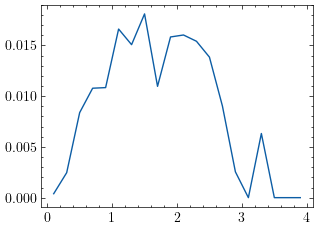

In [43]:
plt.plot(zbins,dNmrg_dzdt)

In [44]:
dNmrg_dzdt = np.array([dNmrgdz[i]/dt_zbins[i]/10**9
                           for i in range(zbins.size)]) ## yr^-1 

print("total merger rate (yr^-1): ",np.sum(dNmrg_dzdt*zbinsize))

total merger rate (yr^-1):  0.034520773133359745
